<a href="https://colab.research.google.com/github/waraaaho/IBM_DS/blob/main/Statistic_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align=center><font size = 5>Assignment: Notebook for Peer Assignment</font></h1>


In [1]:
%load_ext sql

In [2]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [ ]:
!pip install -q pandas==1.1.5

     |████████████████████████████████| 9.5 MB 14.4 MB/s 


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [10]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url,index_col=0)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Problems



### Task 4: Generate Descriptive Statistics and Visualizations


Median is about 20K


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


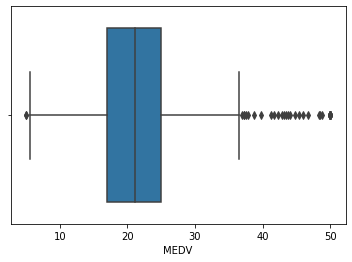

In [53]:
import seaborn as sns
sns.boxplot(boston_df.MEDV)
print('Median is about 20K')

Most is not tract bounds river


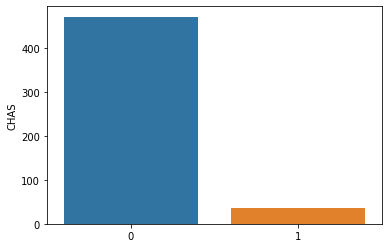

In [54]:
sns.barplot(x = [0,1],y=boston_df.CHAS.value_counts())
print('Most is not tract bounds river')

We could observe a positive correlation


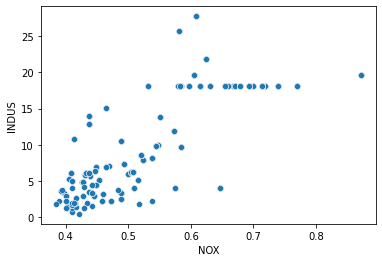

In [55]:
sns.scatterplot(x = boston_df.NOX,y=boston_df.INDUS)
print('We could observe a positive correlation')

High PTRatio is the most frequent


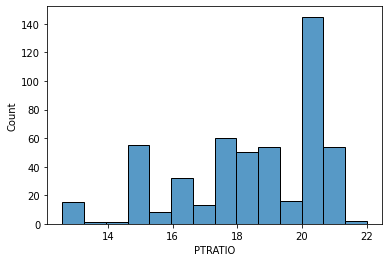

In [56]:
sns.histplot(boston_df.PTRATIO)
print('High PTRatio is the most frequent')

### Task 5

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [29]:
import scipy.stats 

In [58]:
print('H0: No significant difference in median value of houses bounded by the Charles river')
print('H1: There is significant difference in median value of houses bounded by the Charles river')
_,pvalue = scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1].MEDV,boston_df[boston_df['CHAS']==0].MEDV)
print('Yes, there is a significant difference with p-value',pvalue)

H0: No significant difference in median value of houses bounded by the Charles river
H1: There is significant difference in median value of houses bounded by the Charles river
Yes, there is a significant difference with p-value 7.390623170519905e-05


In [57]:
print('H0: No significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)')
print('H1: There is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)')
_,pvalue = scipy.stats.f_oneway(boston_df[boston_df['AGE']>=(2022-1940)].MEDV,boston_df[boston_df['AGE']<(2022-1940)].MEDV)
print('Yes, there is a significant difference with p-value',pvalue)

H0: No significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
H1: There is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
Yes, there is a significant difference with p-value 6.858213624842647e-16


In [59]:
print('H0: No relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')
print('H1: There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')
coef,pvalue = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print('Yes, there is a significant difference with p-value',pvalue, 'and coefficient', coef)

H0: No relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
H1: There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
Yes, there is a significant difference with p-value 7.913361061238693e-98 and coefficient 0.7636514469209151


In [52]:
import statsmodels.api as sm
X = boston_df.drop('MEDV',axis=1)
y = boston_df.MEDV
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
print('One additional unit of DIS will decrease MEDV by 0.8696')

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              908.7
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                        0.00
Time:                        13:43:32   Log-Likelihood:                         -1539.0
No. Observations:                 506   AIC:                                      3102.
Df Residuals:                     494   BIC:                                      3153.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------